In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("wine.csv") 
X = df.iloc[:, 1:].values # exclude class labels

In [3]:
data=pd.read_csv('wine.csv')
data.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Task 1

In [13]:
sse = []
print("K-Means Clustering Errors:\n")
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=1, max_iter=20, random_state=42)
    kmeans.fit(X_scaled)
    error = kmeans.inertia_
    sse.append(error)
    print(f"For k = {k} After 20 iterations: Error = {error:.4f}")

K-Means Clustering Errors:

For k = 2 After 20 iterations: Error = 1661.6761
For k = 3 After 20 iterations: Error = 1277.9285
For k = 4 After 20 iterations: Error = 1211.7531
For k = 5 After 20 iterations: Error = 1123.1565
For k = 6 After 20 iterations: Error = 1079.5385
For k = 7 After 20 iterations: Error = 1014.4309
For k = 8 After 20 iterations: Error = 982.6550


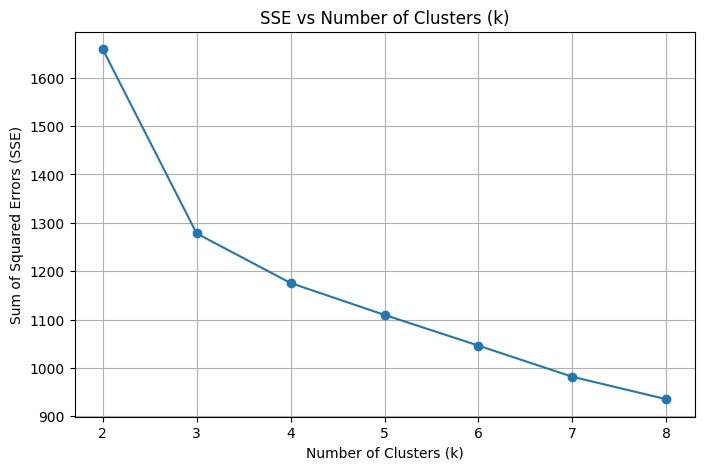

In [ ]:
# sse vs k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), sse, marker='o')
plt.title("SSE vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

According to the elbow method, a good value for K is 3.

## Task 2

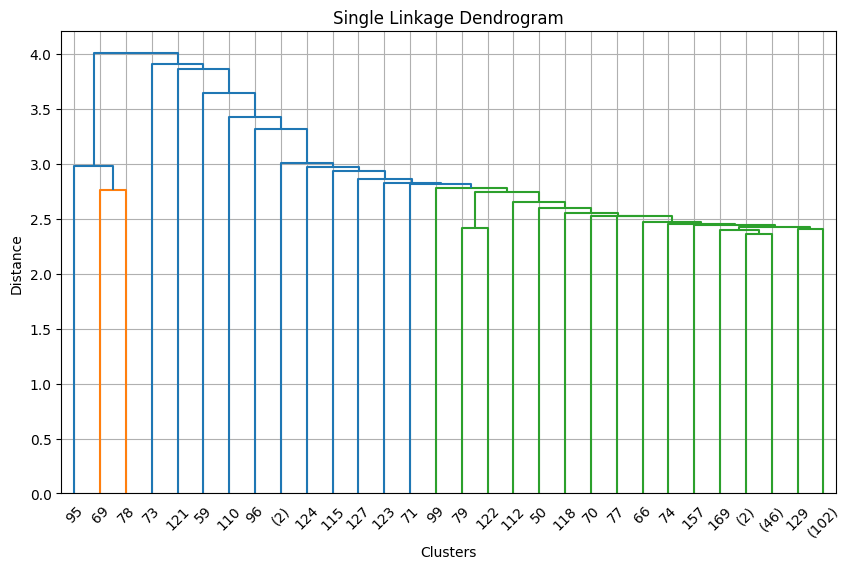

Silhouette Score (Single Linkage, k=4): 0.1811


In [ ]:
# a) Single Linkage Clustering
linked_single = linkage(X_scaled, method='single', metric='euclidean')

# dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked_single, truncate_mode='lastp', p=30)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# compute clusters & silhouette score
labels_single = fcluster(linked_single, t=4, criterion='maxclust')
silhouette_single = silhouette_score(X_scaled, labels_single)
print(f"Silhouette Score (Single Linkage, k=4): {silhouette_single:.4f}")

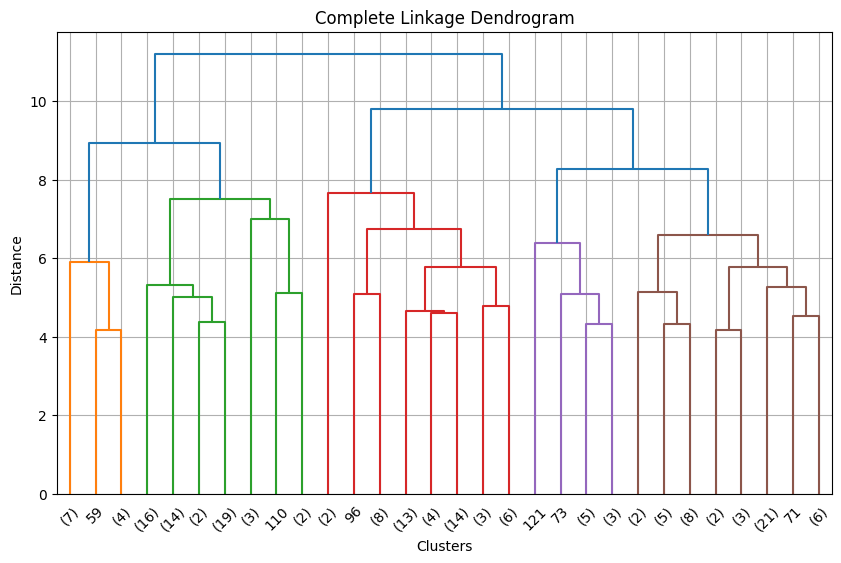

Silhouette Score (Complete Linkage, k=4): 0.1938


In [10]:
# b) Complete Linkage Clustering
linked_complete = linkage(X_scaled, method='complete', metric='euclidean')

# dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked_complete, truncate_mode='lastp', p=30)
plt.title("Complete Linkage Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# compute clusters & silhouette score
labels_complete = fcluster(linked_complete, t=4, criterion='maxclust')
silhouette_complete = silhouette_score(X_scaled, labels_complete)
print(f"Silhouette Score (Complete Linkage, k=4): {silhouette_complete:.4f}")
